In [1]:
import sys
sys.path.append('../')
sys.path.append('../get_branch/linear')
sys.path.append('../get_branch/cnn')
sys.path.append('../model_json/make_json_program/cnn')

import json
import numpy as np
import matplotlib.pyplot as plt

import make_simple_cnn_json
import linear_input_branch
import linear_hidden_branch
import linear_output_branch
import cnn_input_branch
import cnn_hidden_branch
import cnn_output_branch

In [2]:
#画像は正方形を仮定
IMG_SIZE = 32

In [3]:
make_simple_cnn_json.make_json()

In [4]:
json_file = open('../model_json/json/simple_cnn.json', 'r')
json_value  = json.load(json_file)
json_value

{'layer0': {'input_channels': 1,
  'out_channels': 32,
  'kernel_size': 3,
  'layer_type': 'input',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer1': {'input_channels': 32,
  'out_channels': 64,
  'kernel_size': 3,
  'layer_type': 'hidden',
  'processing_type': 'cnn',
  'skip_connection_flag': False},
 'layer2': {'input_features': 9216,
  'out_features': 128,
  'layer_type': 'hidden',
  'processing_type': 'linear'},
 'layer3': {'input_features': 128,
  'out_features': 10,
  'layer_type': 'output',
  'processing_type': 'linear'}}

In [5]:
#dictからlistを作成（最初からlistを作成したほうが楽だったかも）
branch_list = np.empty(0)

for i in range(len(json_value)):
    layer_json_value = json_value["layer" + str(i)]
    
    #input層
    if layer_json_value["layer_type"] == "input":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_input_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_input_branch.get_branch(layer_json_value,IMG_SIZE))
        
    #hidden層
    if layer_json_value["layer_type"] == "hidden":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_hidden_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_hidden_branch.get_branch(layer_json_value,IMG_SIZE))
    
    #output層      
    if layer_json_value["layer_type"] == "output":
        if layer_json_value["processing_type"] == "linear":
            branch_list = np.append(branch_list,linear_output_branch.get_branch(layer_json_value))
            
        elif layer_json_value["processing_type"] == "cnn":
            branch_list = np.append(branch_list,cnn_output_branch.get_branch(layer_json_value,IMG_SIZE))
            
branch_list

array([288., 288., 288., ...,  10.,  10.,  10.])

(array([  128.,     0.,  9216.,     0.,  1024.,     0.,     0.,     0.,
            0., 32768.]),
 array([ 10. ,  66.6, 123.2, 179.8, 236.4, 293. , 349.6, 406.2, 462.8,
        519.4, 576. ]),
 <a list of 10 Patch objects>)

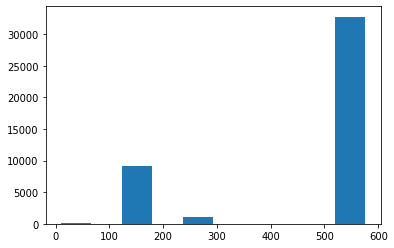

In [6]:
plt.hist(branch_list)